<a href="https://colab.research.google.com/github/taylan-sen/CIS490b_computer_vision/blob/main/SelfiSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation Lab

We previously learned how to do segmentation based on pixel color using kmeans (see [Segmentation Intro notebook](https://github.com/taylan-sen/CIS490b_computer_vision/blob/main/SegmentationIntro.ipynb)). Recall that we provided kmeans a number of "clusters", it then found an "ideal" set of color "means", after which each pixel in the image was assigned to the cluster which was the closest color. While kmeans is simple and can be widely applied, we saw its limitations in that some independent pixels or small groups of pixels formed a group, which didn't always track an object; in other words, kmeans didn't always produce contiguous regions as segments.  

In this lab we use a more advanced "intelligent" segmentation technique in which the segmentor has knowledge of what a typical human body looks like.

### Questions
1. Give a brief description of each of the following python modules:
  * cvzone
  * mediapipe


2. Complete the code below using your own photo of you, and then answer:
  * How well did it segment your image?
  * What portions of your body did it incorrectly cut off or what parts of the source picture did it paste onto the background that it should not have?  


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


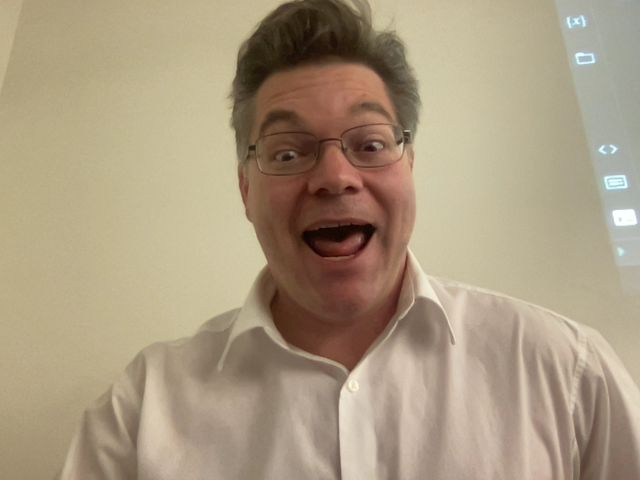

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

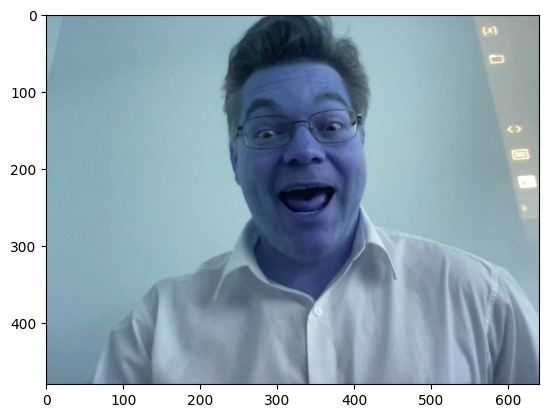

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg')
plt.imshow(img)

In [ ]:
!wget 'https://www.thewowstyle.com/wp-content/uploads/2015/01/trip-to-niagara-falls.jpg'


--2023-10-18 16:35:21--  https://www.thewowstyle.com/wp-content/uploads/2015/01/trip-to-niagara-falls.jpg
Resolving www.thewowstyle.com (www.thewowstyle.com)... 141.193.213.20, 141.193.213.21
Connecting to www.thewowstyle.com (www.thewowstyle.com)|141.193.213.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 656429 (641K) [image/jpeg]
Saving to: ‘trip-to-niagara-falls.jpg’

trip-to-niagara-fal 100%[===================>] 641.04K  --.-KB/s    in 0.03s   

2023-10-18 16:35:21 (18.2 MB/s) - ‘trip-to-niagara-falls.jpg’ saved [656429/656429]



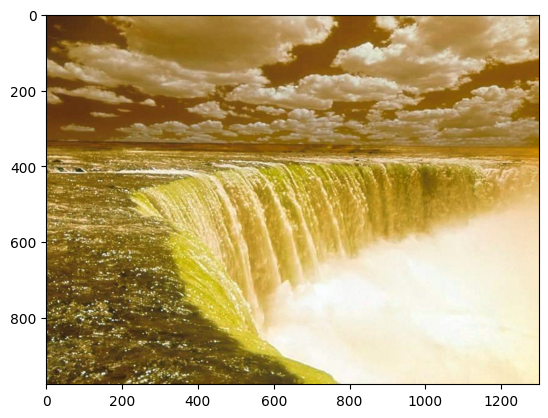

In [ ]:
background = cv2.imread('trip-to-niagara-falls.jpg')
plt.imshow(background)

In [ ]:
!pip install cvzone
!pip install mediapipe

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26296 sha256=c9fa90ef3ad9ba84ea823d28e7390504a0b64c403f60df802fda13f77b157387
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 45.4 MB/s eta 0:00:00


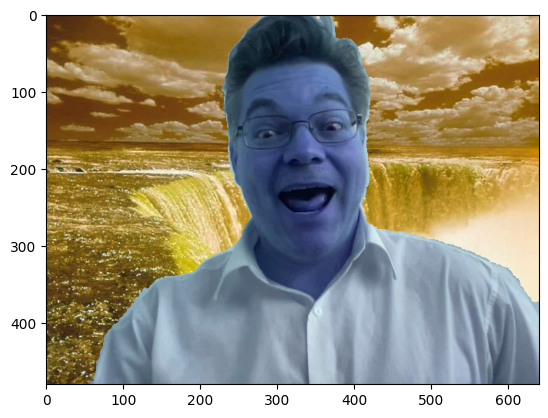

In [ ]:
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation

background = cv2.resize(background, (img.shape[1], img.shape[0]))

segmentor = SelfiSegmentation()
human = segmentor.removeBG(img, background)
plt.imshow(human)
plt.show()
